In [ ]:
import os
import sys
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Add the path to the custom library to the system path
sys.path.append(str(Path().resolve().parent.parent))

# Import the module from the custom library
from src import Tensor, metrics
from src.architectures.sequential import Sequential
from src.core.utils import data_analysis, context_manager, data_processing

### Constants


In [2]:
# Define constants
model_path = os.path.join(os.getcwd(), 'checkpoints', 'digits_classifier')

### Load dataset


In [ ]:
# Load digits dataset
digits = load_digits()

# Extract input and target tensors
X = Tensor(np.array(digits['data'], dtype=np.float32)) # type: ignore
y = Tensor(np.array(digits['target']), dtype=np.int8) # type: ignore

# Reproduce the train/test split strategy from training notebook
_, X_test, _, y_test = data_processing.split_data((X, y), split_pct=0.2, shuffle=True)[0]

# Normalize inputs
X_test = X_test / 255.0

### Load the model


In [4]:
# Load the trained model
model: Sequential = Sequential.load(model_path)

# Set the model to evaluation mode
model.eval()

### Inference


In [5]:
# Set the context manager to no_grad to disable gradient tracking during inference
with context_manager.no_grad():
    # Compute logits/probabilities
    preds = model(x=X_test)

# Convert probabilities to predicted class ids
predictions = Tensor(np.argmax(preds.output.data, axis=1), dtype=np.int8)

# Compute metrics
num_classes = 10
accuracy = metrics.accuracy(y_test, predictions)
confusion_matrix = metrics.confusion_matrix(num_classes, y_test, predictions)

# Print accuracy
print(f'\nAccuracy: {accuracy.data:.4f}')


Accuracy: 0.9944


### Display predictions


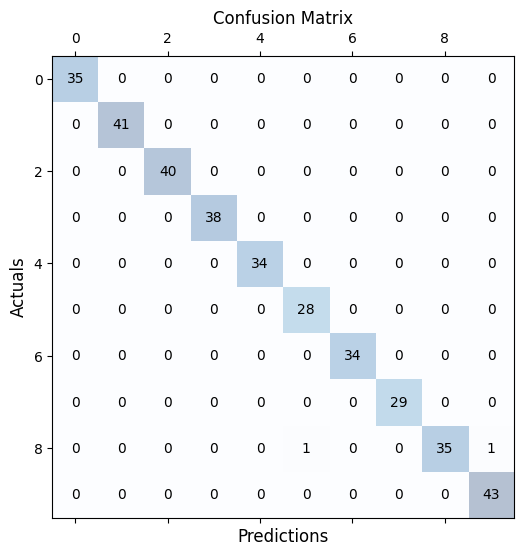

In [7]:
# Plot confusion matrix
data_analysis.plot_confusion_matrix(confusion_matrix)

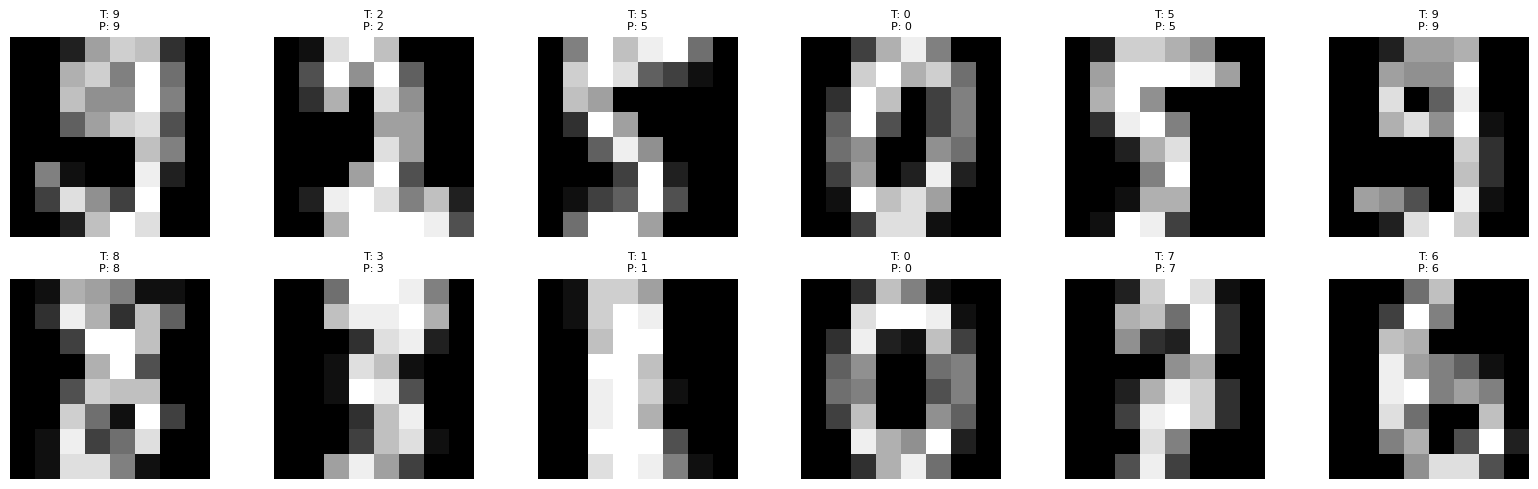

In [8]:
# Plot a few predictions
n_samples = 12
plt.figure(figsize=(16, 5))
for i in range(n_samples):
    plt.subplot(2, 6, i + 1)
    image = X_test.data[i].reshape(8, 8)
    true_label = int(y_test.data[i])
    pred_label = int(predictions.data[i])
    plt.imshow(image, cmap='gray')
    plt.title(f'T: {true_label}\nP: {pred_label}', fontsize=8)
    plt.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
